In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [7]:
# Loading the Dataset
data = pd.read_csv("tips Dataset.csv")

In [9]:
# Analyse Top 5 rows of the Dataset
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### Let’s have a look at the tips given to the waiters according to:

1. the total bill paid
2. number of people at a table
3.  the day of the week:

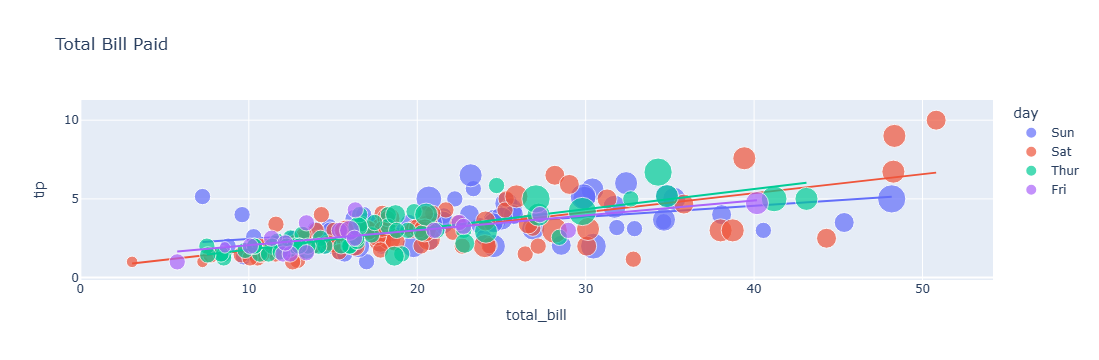

In [19]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols", title = 'Total Bill Paid')
figure.show()

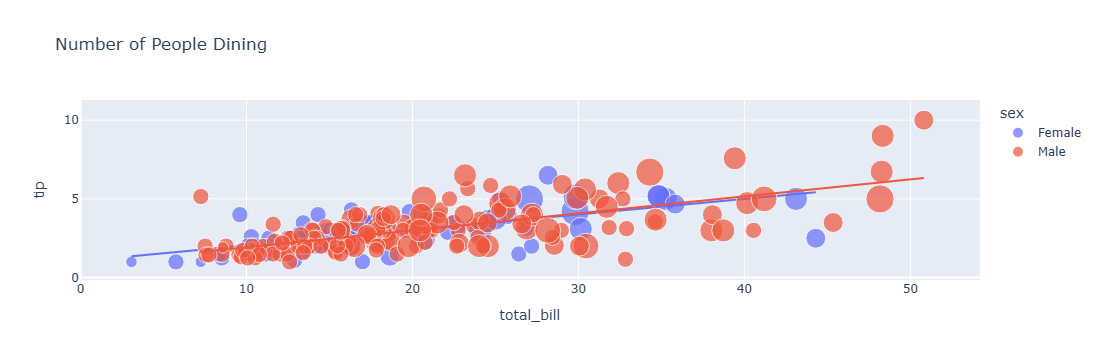

In [21]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols", title = 'Number of People Dining')
figure.show()

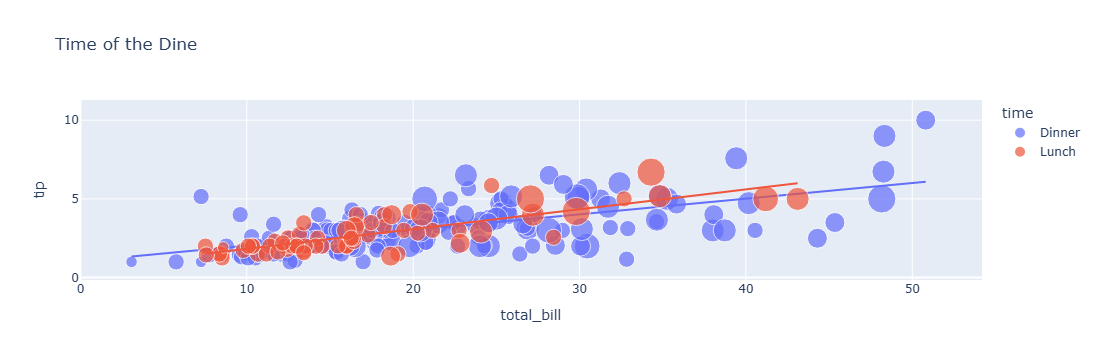

In [23]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols", title = 'Time of the Dine')
figure.show()

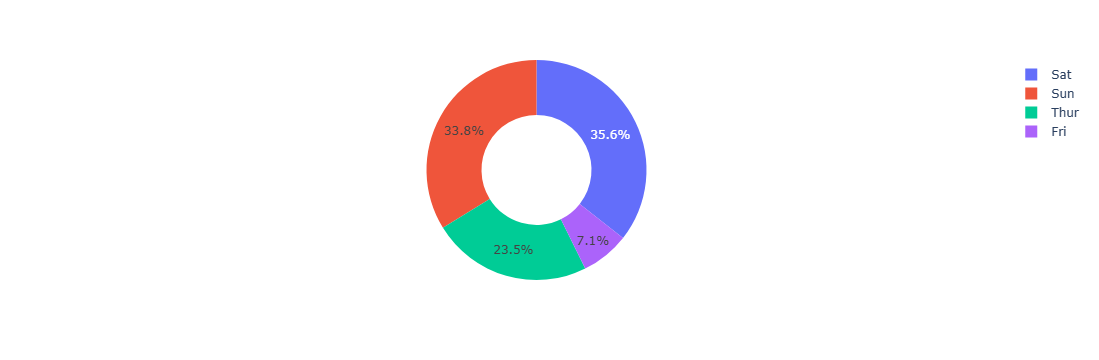

In [25]:
# Now let’s see the tips given to the waiters according to the days to find out which day the most tips are given to the waiters
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

##### According to the visualization above, on Saturdays, most tips are given to the waiters.

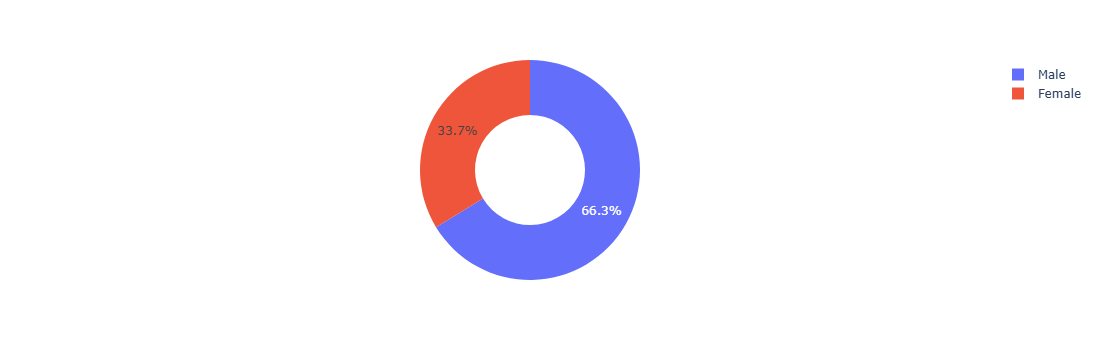

In [28]:
# Now let’s look at the number of tips given to waiters by gender of the person paying the bill to see who tips waiters the most
figure = px.pie(data, 
             values='tip', 
             names='sex',hole = 0.5)
figure.show()

##### According to the visualization above, most tips are given by men.

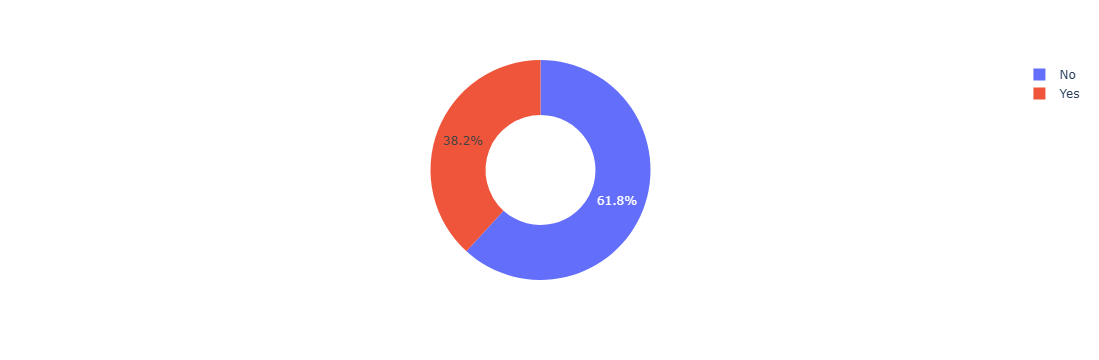

In [31]:
# Now let’s see if a smoker tips more or a non-smoker
figure = px.pie(data, 
             values='tip', 
             names='smoker',hole = 0.5)
figure.show()

##### According to the visualization above, non-smoker tips waiters more than smokers.

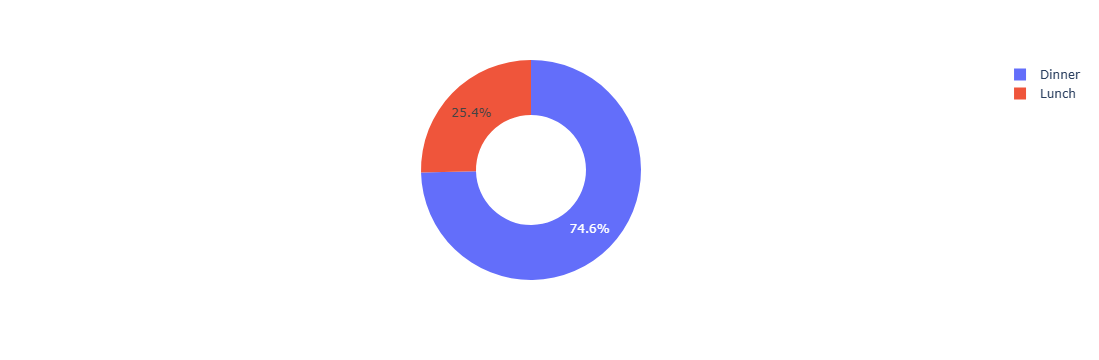

In [34]:
# Now let’s see if most tips are given during lunch or dinner
figure = px.pie(data, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

##### According to the visualization above, a waiter is tipped more during dinner.



#### Waiter Tips Prediction Model


In [38]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [40]:
# Now I will split the data into training and test sets
x = np.array(data[["total_bill", "sex", "smoker", "day", 
                   "time", "size"]])
y = np.array(data["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [42]:
# Now let's train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [44]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.73742609])

#### Summary

Waiter Tips analysis is one of the popular data science case studies where we need to predict the tips given to a waiter for serving the food in a restaurant.